In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GP = {
    'dim' : 2, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.32,
    'res' : 20, #resolution within one period
    'downsample_ratio': 0.1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.660,
    'n_sub' : 1, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.12, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.31,
    'dh' : 0.005, #the step size of h.
    'path' : "sim_cache_TiO2_lam660nm/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\simulator.py:74: UserWarning: Your global parameters have changed. be careful loading any cached data, it may be in consist!
  warnings.warn('Your global parameters have changed. be careful loading any cached data, it may be in consist!')


If dowmsample_ratio changed, it only need to rerun fitting E.
It is ok to change n_sub, which is decoupled with the cached data.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\modes2D.py:24: UserWarning: Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.            To debug, you have to get yourself familiar with tidy3d (the ideal of upload sim to cloud and download results after the sim is done.            Or, you can try to restart your jupyter notebook and running everythin from begining. The drawback is gen_modes() is usually slow and restart won't promise good results.
  warnings.warn("Unlike gen modes 1D which is done locally. gen modes 2D is tricky. because we have to comunicate with tidy3d. Error can happen.\


In [3]:
N = 100
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
wgs_path = "output_cmt/Apr27_N100PBA_590nm_init_minmax/waveguide_widths.csv"
PBA_widths = np.genfromtxt(wgs_path, delimiter = ',')

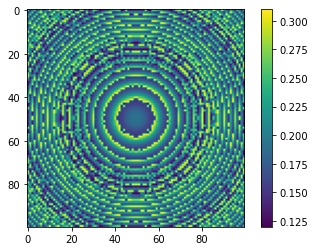

In [4]:
plt.imshow(PBA_widths.reshape(N,N))
plt.colorbar()

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_2D.py:24: UserWarning: Fullwave is expensive and slow. You can set the prop_dis = 0, and use near_to_far to get the far field. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn("Fullwave is expensive and slow. You can set the prop_dis = 0, and use near_to_far to get the far field. Only do fullwave on small devices. And low resolution can be inaccurate.")


Fullwave resolution: 50
numerical aperture: 0.73
total running time: 1.1007615120208131e-12
Tidy3D PlaneWave:
name            = None
injection_axis  = +z
position        = -7.52
source_time     = GaussianPulse(
    frequency  = 4.54e+14,
    fwidth     = 4.54e+13,
    offset     = 5.00)
polarization    = y
amplitude       = 1.00e+00

Initializing simulation...
Mesh step (micron): [2.00e-02, 2.00e-02, 2.00e-02].
Simulation domain in number of grid points: [1710, 1710, 786].
Total number of computational grid points: 2.30e+09.
Total number of time steps: 31755.
Estimated data size (GB) of monitor axis: 0.0000.
Estimated data size (GB) of monitor focal_plane: 0.0001.
Estimated data size (GB) of monitor incident: 0.1355.
Estimated data size (GB) of monitor near_field: 0.1355.
Estimated data size (GB) of monitor focal_plane_1: 0.1355.
Estimated data size (GB) of monitor focus: 0.0009.
Estimated data size (GB) of monitor cross_section1: 0.0610.


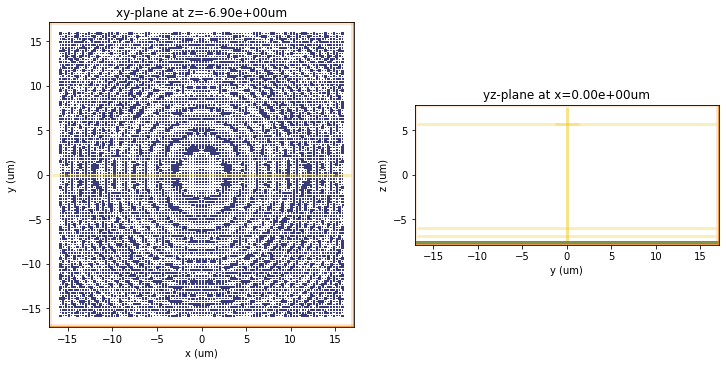

In [5]:
sim.fullwave.init_sim(prop_dis, N, PBA_widths, res = 50)

In [6]:
# sim.fullwave.upload(task_name="tidy3d_Apr27_N" + str(N) + "660nm")
# sim.fullwave.download(data_path="output_cmt/")

Using Tidy3D credentials from stored file
Uploading the json file...
Project 'tidy3d_Apr27_N100660nm' status: success...                                  

Simulation domain Nx, Ny, Nz: [1710, 1710, 786]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 2.2983e+09.
Using subpixel averaging: True
Number of time steps: 31755
Automatic shutoff factor: 1.00e-05
Time step (s): 3.4665e-17

Compute source modes time (s):     0.5204
Compute monitor modes time (s):    0.6115

Rest of setup time (s):            4.8683

Starting solver...
- Time step    505 / time 1.75e-14s (  1 % done), field decay: 1.00e+00
- Time step   1270 / time 4.40e-14s (  4 % done), field decay: 1.00e+00
- Time step   2540 / time 8.80e-14s (  8 % done), field decay: 4.02e-01
- Time step   3810 / time 1.32e-13s ( 12 % done), field decay: 1.05e-01
- Time step   5080 / time 1.76e-13s ( 16 % done), field decay: 2.06e-02
- Time step   6350 / time 2.20e-13s ( 20 % done), field decay: 8.48e-03
- Time step   762

Applying source normalization to all frequency monitors using source index 0.


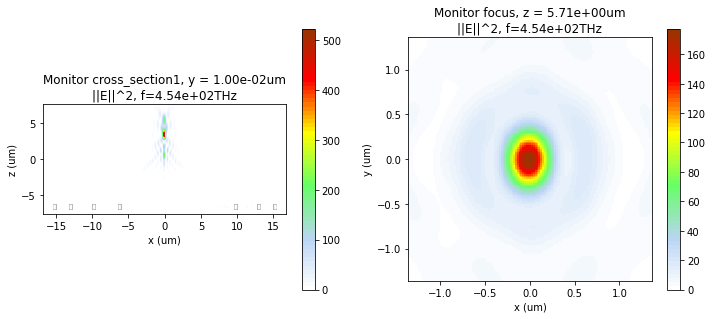

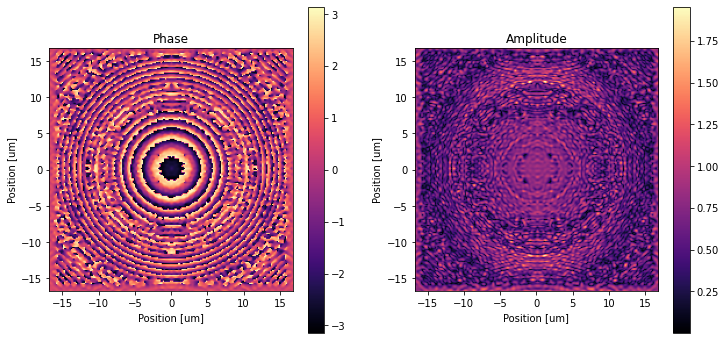

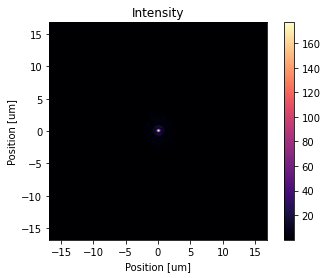

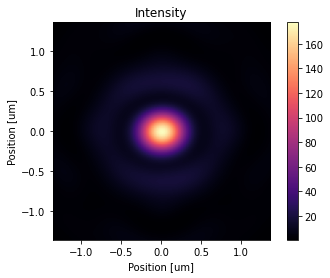

return field: Ey_near, Ey_near_FW, Ey_far, Ey_far_FW. Ey_near is downsampled Ey_near_FW, so that resolution is same with cmt model.


In [6]:
Ey_near, Ey_near_FW, Ey_far, Ey_far_FW = sim.fullwave.vis_monitor(path = "output_cmt/" + "tidy3d_Apr27_N" + str(N) + "660nm/")

fwhm = 0.4000 um, 0.61 $\lambda$
f_kernel generated.
Model initialized.
using device:  cuda
I_in: 4410000.000000, I_out: 65964049694720.000000, I_out/I_in: 14957834.397896.


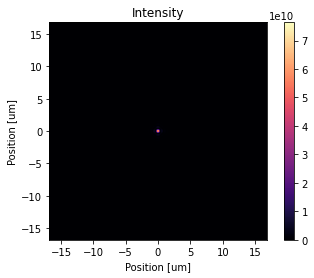

Ideal focal area power/total_far_field_power = 84.22%
fwhm_airy = 0.3600 um,  0.55 $\lambda$


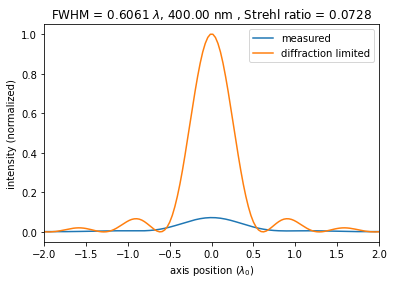

transmission efficiency = 97.56%
far field efficiency = 73.71%
focusing efficiency = 14.40%
focal area power/total_far_field_power = 19.53%


In [7]:
sim.fullwave.results_analysis()